# Linear Regression
Trainer : - Rajesh Jakhotia

### Data File: inc_exp_data.csv
#### The file contains data about Households, their Income & Expenses

## Attributes
#### 1: Mthly_HH_Income: Monthly Household Income
#### 2: Mthly_HH_Expense: Monthly Household Expense
#### 3: No_of_Fly_Members: No of Family Members
#### 4: Emi_or_Rent_Amt: Monthly EMI or Rent Expense 
#### 5: Annual_HH_Income: Annual Household Income
#### 6: Highest_Qualified_Member: Qualification of Highest Qualified Member in the Family
#### 7: No_of_Earning_Members: Number of Earning Members in the Household

In [1]:
import statsmodels.formula.api as sma
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

In [2]:
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


## Simple Linear Regression
## Linear Regression between Expense ~ Income

### Step 1: Scatter Plot to visually see the trend

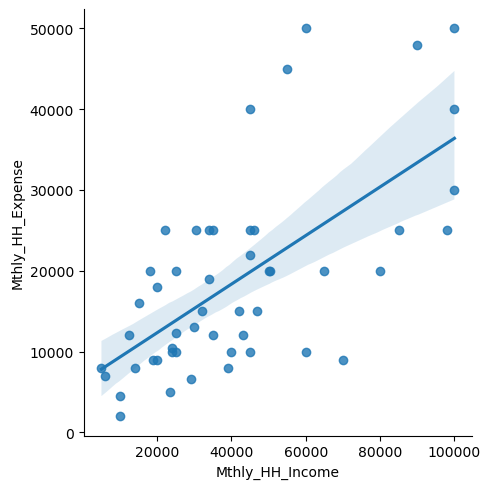

In [3]:
## Scatter Plot
sns.lmplot(x ="Mthly_HH_Income", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [4]:
## Simple Linear Regression Model
linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income" , 
                    data = inc_exp).fit()

In [5]:
#Get the model summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.97
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           3.40e-07
Time:                        11:46:08   Log-Likelihood:                -526.77
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      48   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6319.1018   2488.733      2.539      0.014    1315.168    1.13e+04
Mthly_HH_Income     0.3008      0.051      5.914      0.000       0.198       0.403
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.471
Skew:                           0.774   Prob(JB):                       0.0649
Kurtosis:                       3.479   Cond. No.                     9.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using Generative AI for Building Linear Regression Model

Prompt 1: Explain linear regression.

Prompt 2: Can you explain the basic concept of linear regression, including its key assumptions and a simple example, for a beginner in statistics?

Prompt 3: Make a linear regression model.  (This is an average prompt)

Prompt 4: Create a linear regression model using the provided dataset named as 'inc_exp' to predict Mthly_HH_Expense. The dataset includes features such as Mthly_HH_Income, No_of_Fly_Members, and Emi_or_Rent_Amt of the household. Before creating the model, provide necessary code for data visualization and then build the model. After creating the model, evaluate its performance using R-squared and Mean Absolute Error (MAE) metrics. Provide a summary of the model's coefficients, p-value and predictions for a sample of test data.


Why the Prompt No. 4 is a Good Prompt:

Specific Details: Clearly specifies the target variable Mthly_HH_Expensece') and the featuresMthly_HH_Income, No_of_Fly_Members, and Emi_or_Rent_Amtge).
Context Provided: Gives context about the datinc_expces) and the goal of the model (prediction).
Expected Outcome: Outlines what is expected (model creation, performance evaluation, summary of coefficients, and sample predictions).

## Multiple Linear Regression

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

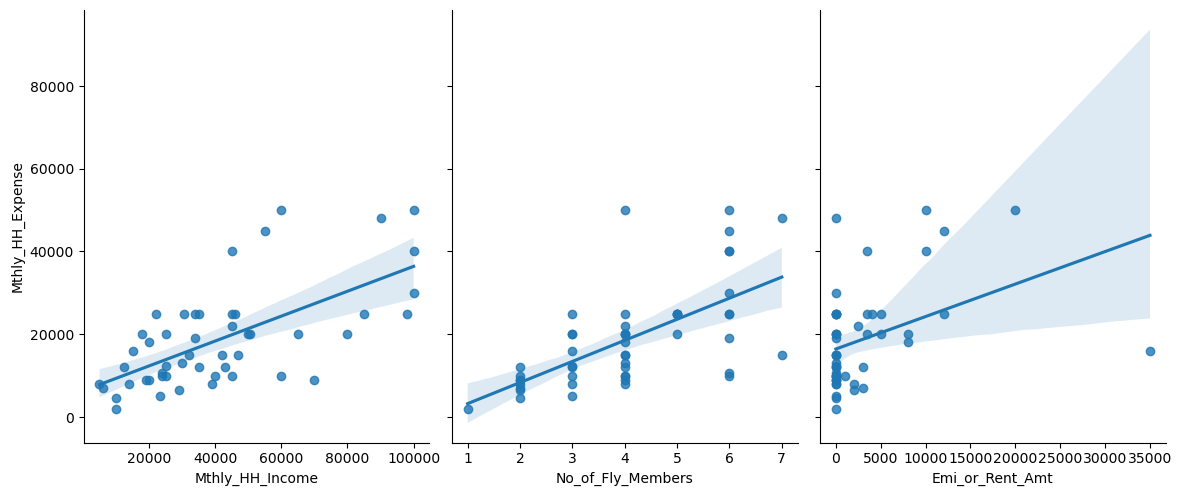

In [7]:
# Plot the distributions of the features and target
sns.pairplot(inc_exp, x_vars=['Mthly_HH_Income', 'No_of_Fly_Members', 'Emi_or_Rent_Amt'], 
             y_vars='Mthly_HH_Expense', height=5, aspect=0.8, kind='reg')
plt.show()

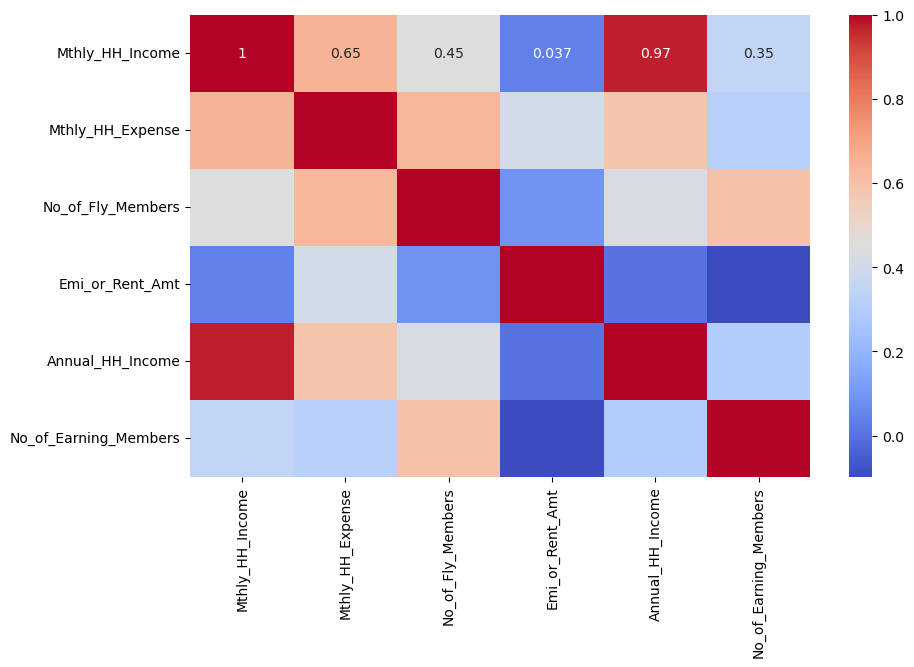

In [8]:
# Plot heatmap to show correlations
plt.figure(figsize=(10, 6))
sns.heatmap(inc_exp.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

### Multiple Linear Regression - Adjusted R-Squared 

In [9]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           5.17e-12
Time:                        08:28:04   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
inc_exp['Sr_No'] = np.arange(1,51)
inc_exp

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Sr_No
0,5000,8000,3,2000,64200,Under-Graduate,1,1
1,6000,7000,2,3000,79920,Illiterate,1,2
2,10000,4500,2,0,112800,Under-Graduate,1,3
3,10000,2000,1,0,97200,Illiterate,1,4
4,12500,12000,2,3000,147000,Graduate,1,5
5,14000,8000,2,0,196560,Graduate,1,6
6,15000,16000,3,35000,167400,Post-Graduate,1,7
7,18000,20000,5,8000,216000,Graduate,1,8
8,19000,9000,2,0,218880,Under-Graduate,1,9
9,20000,9000,4,0,220800,Under-Graduate,2,10


In [11]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt+\
                      Sr_No", data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     26.53
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           2.45e-11
Time:                        08:28:04   Log-Likelihood:                -510.17
No. Observations:                  50   AIC:                             1030.
Df Residuals:                      45   BIC:                             1040.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5532.9739   2889.283     -1.915      0.062   -1.14e+04     286.341
Mthly_HH_Income       0.1195      0.119      1.004      0.321      -0.120       0.359
No_of_Fly_Members  3127.4765    738.572      4.234      0.000    1639.917    4615.036
Emi_or_Rent_Amt       0.7123      0.162      4.407      0.000       0.387       1.038
Sr_No               176.8449    216.132      0.818      0.418    -258.468     612.158
==============================================================================
Omnibus:                        0.389   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.165
Skew:                           0.141   Prob(JB):                        0.921
Kurtosis:                       3.005   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Variable Transformation

#### Chain-of-thought
Promp 5: can you suggest some variable transformations that may be helpful. I do understand that you do not have the data, however, suggest the potential transformations to be tried to improve the overall model performance.

## Multi-Collinearity & Variance Inflation Factor

#### Chain-of-thought
provide me code to check whether there is multicollinearity in the model

# Thank You
## Find below the code to build Linear Regression 
- Multicolinearity and VIF Code
- Variable Transformation
- Linear Regression using Scikit Learn and Regularization

In [12]:
f_str = "Mthly_HH_Expense ~ Mthly_HH_Income + No_of_Fly_Members + Emi_or_Rent_Amt + Annual_HH_Income"
m_linear_mod = sma.ols(formula = f_str,
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     27.40
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           1.48e-11
Time:                        08:28:04   Log-Likelihood:                -509.59
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      45   BIC:                             1039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5124.8763   2818.362     -1.818      0.076   -1.08e+04     551.597
Mthly_HH_Income       0.4092      0.157      2.608      0.012       0.093       0.725
No_of_Fly_Members  3224.4195    719.071      4.484      0.000    1776.136    4672.703
Emi_or_Rent_Amt       0.6569      0.158      4.162      0.000       0.339       0.975
Annual_HH_Income     -0.0167      0.013     -1.314      0.196      -0.042       0.009
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.013
Skew:                           0.035   Prob(JB):                        0.993
Kurtosis:                       2.963   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multi-Collinearity & Variance Inflation Factor

In [13]:
## Variance Inflation Factor (VIF) for Multi-Collinearity Check
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(formula,data):
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Var_Name"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    return(vif.round(1))

vif_check =VIF(f_str,data = inc_exp)
vif_check 

,Var_Name,VIF
0,Intercept,8.6
1,Mthly_HH_Income,17.7
2,No_of_Fly_Members,1.3
3,Emi_or_Rent_Amt,1.0
4,Annual_HH_Income,17.4


## Variable Transformation

#### Chain-of-thought
Promp 6: can you suggest some variable transformations that may be helpful. I do understand that you do not have the data, however, suggest the potential transformations to be tried to improve the overall model performance.

In [14]:
## Multiple Linear Regression
f_str = "Mthly_HH_Expense ~ Mthly_HH_Income + No_of_Fly_Members + Emi_or_Rent_Amt"
m_linear_mod = sma.ols(formula = f_str,
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           5.17e-12
Time:                        08:28:04   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

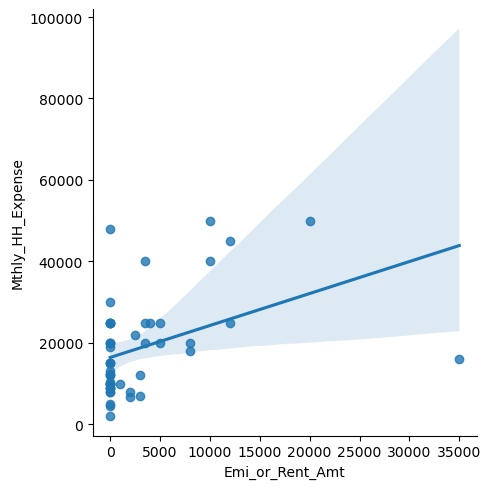

In [15]:
sns.lmplot(x ="Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

(array([36.,  6.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <BarContainer object of 10 artists>)

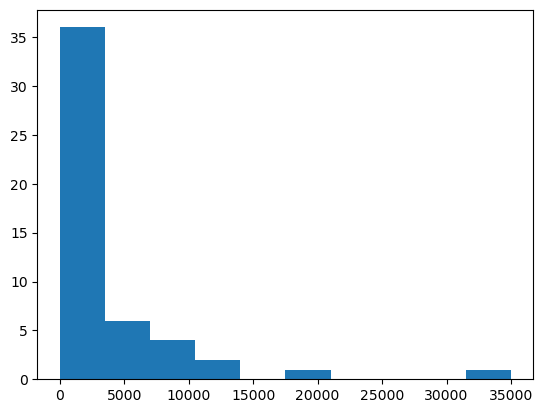

In [16]:
plt.hist(inc_exp['Emi_or_Rent_Amt'])

(array([30.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  8.,  2.]),
 array([ 0.        ,  1.04631319,  2.09262638,  3.13893957,  4.18525276,
         5.23156596,  6.27787915,  7.32419234,  8.37050553,  9.41681872,
        10.46313191]),
 <BarContainer object of 10 artists>)

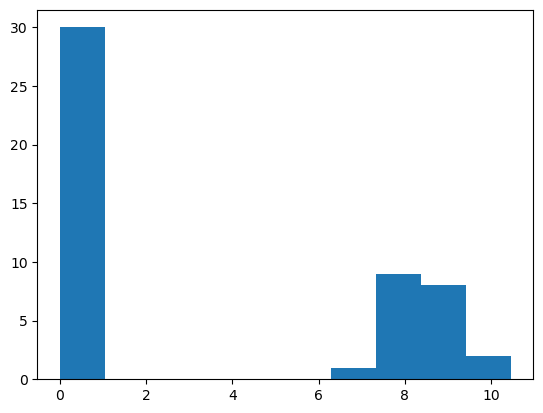

In [17]:
inc_exp['Ln_Emi_or_Rent_Amt'] = np.log(inc_exp['Emi_or_Rent_Amt'] + 1)
plt.hist(inc_exp['Ln_Emi_or_Rent_Amt'])

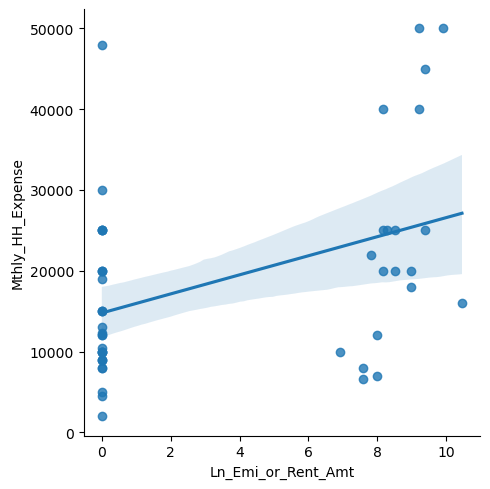

In [18]:
sns.lmplot(x ="Ln_Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [19]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Ln_Emi_or_Rent_Amt  ",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     48.36
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           2.87e-14
Time:                        08:28:05   Log-Likelihood:                -504.85
No. Observations:                  50   AIC:                             1018.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -7948.7852   2608.949     -3.047      0.004   -1.32e+04   -2697.243
Mthly_HH_Income        0.2286      0.038      6.078      0.000       0.153       0.304
No_of_Fly_Members   3219.5047    646.275      4.982      0.000    1918.620    4520.389
Ln_Emi_or_Rent_Amt  1224.0029    205.497      5.956      0.000     810.360    1637.646
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.615
Skew:                           0.519   Prob(JB):                        0.271
Kurtosis:                       2.581   Cond. No.                     1.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction using the Model

In [20]:
#prediction
y_pred = m_linear_mod.predict(inc_exp[["Mthly_HH_Income",
                                        "No_of_Fly_Members",
                                        "Ln_Emi_or_Rent_Amt",
                                        ]])
    


### Visually Check Predicted vs Actual values

In [21]:
tmp_df = pd.DataFrame()
tmp_df["Observed"] = inc_exp["Mthly_HH_Expense"] 
tmp_df["Expected"] = y_pred 

tmp_df.head()

,Observed,Expected
0,8000,12157.082686
1,7000,9662.307717
2,4500,776.655666
3,2000,-2442.848993
4,12000,11148.488228


## Test Assumptions of Linear Regression

### Residuals should be normally distributed in Linear Regression

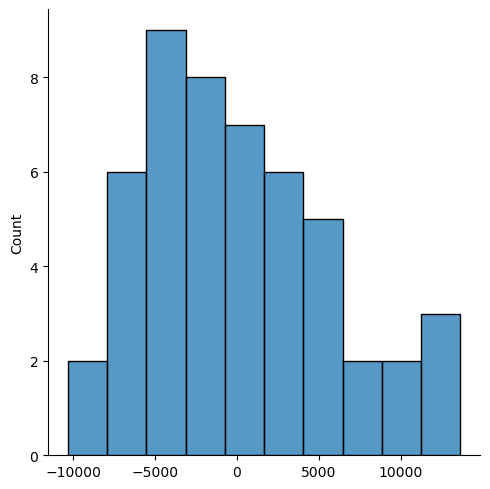

In [22]:
residual = tmp_df["Observed"] - tmp_df["Expected"]
sns.displot(residual, bins = 10)

### Error Should not have any pattern

Text(0, 0.5, 'Residual')

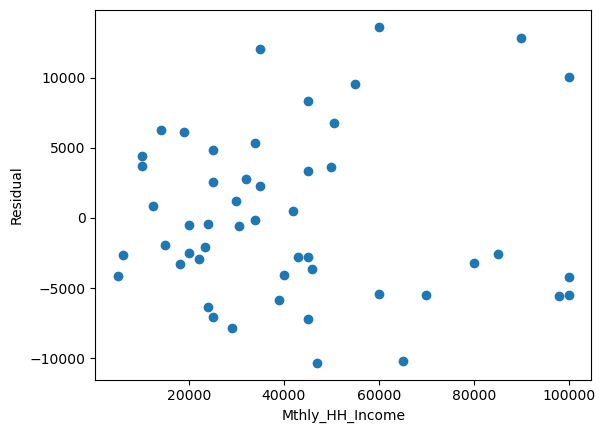

In [23]:
plt.scatter( inc_exp["Mthly_HH_Income"], residual)
plt.xlabel("Mthly_HH_Income")
plt.ylabel("Residual")

## Linear Regression using Scikit Learn

In [24]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
regr = LinearRegression() 
X_train = inc_exp[["Mthly_HH_Income", "No_of_Fly_Members", "Ln_Emi_or_Rent_Amt"]]
y_train = inc_exp["Mthly_HH_Expense"]
regr.fit(X_train, y_train) 
y_pred=  regr.predict(X_train)
print("R Squared of the Model :", r2_score(y_train, y_pred)) 

R Squared of the Model : 0.7592734133185739


### Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(r2_score(y_train, pred_train_enet))

0.7592724118926875


# Thank you